In [8]:
import pandas as pd
import numpy as np

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.analysis.listserv import ListservArchive
from bigbang.analysis.listserv import ListservList
from bigbang.visualisation import graphs

from config.config import CONFIG

plt.style.use("publication_jcap.mplstyle")

In [9]:
color = [
    Color(rgb=(np.array([5, 102, 141])/255)),
    Color(rgb=(np.array([67, 170, 139])/255)),
    Color(rgb=(np.array([248, 150, 30])/255)),
    Color(rgb=(np.array([249, 65, 68])/255)),
]
color = mpl.colors.ListedColormap([c.rgb for c in color])

In [22]:
mlist_name = "3GPP_TSG_CT_WG6"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"/home/christovis/AGE/datactive/bigbang/archives/3GPP/{mlist_name}.mbox",
    include_body=True,
)
coi = [
    "huawei.com",
    "tencent.com",
    "xiaomi.com",
    "chinamobile.com",
    "hisilicon.comzte.com.cn",
    "chinatelecom.cn",
    "chinaunicom.cn",
    "catt.cn",
    "caict.ac.cn",
]

In [23]:
mlist.get_messagecount()

733

In [24]:
mlist.period_of_activity()

[datetime.datetime(2015, 8, 11, 19, 41, 37, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))),
 datetime.datetime(2021, 8, 25, 12, 39, 14, tzinfo=datetime.timezone.utc)]

In [25]:
mlist.get_domainscount(header_fields=['from'])

{'from': 32}

In [26]:
mlist.get_localpartscount(header_fields=['from'])

{'from': 57}

In [4]:
dic_evol = mlist.get_localpartcount_per_domain(years=True)

Text(0, 0.5, '# of localparts')

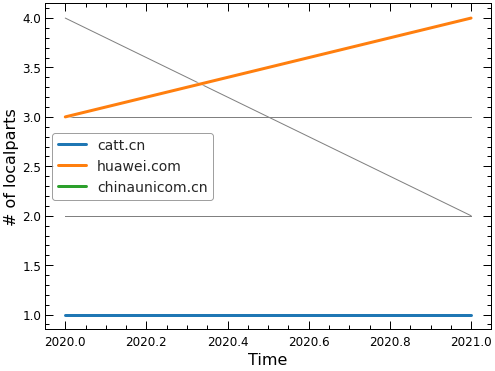

In [5]:
fig, axis = plt.subplots(
    1, 1,
    figsize=(8, 6),
    facecolor="w", edgecolor="k",
)

axis = graphs.evolution_of_graph_property_by_domain(dic_evol, "year", "localparts", domains_of_interest=coi, ax=axis)

axis.legend(loc='best')
axis.set_xlabel('Time')
axis.set_ylabel('# of localparts')